In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
# from numpy.lialg import eig

In [5]:
#2D data
data= np.array([[3, 4], [2,8], [6,9], [10,12]])

In [7]:
df= pd.DataFrame(data, columns=['ml', 'dl'])
df

,ml,dl
0,3,4
1,2,8
2,6,9
3,10,12


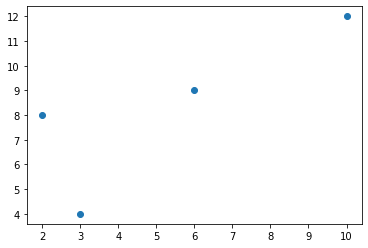

In [8]:
plt.scatter(df['ml'], df['dl'])

In [11]:
#PCA steps

# 1. Standardize data (zero centric data- mean=0)
# 2. cov matrix
# 3. eigen value and eigenvector

data.T #gives transpoze of data
meanByCol= np.mean(data, axis=0)

In [10]:
np.mean(data.T, axis=1) #row wise mean

array([5.25, 8.25])

In [13]:
scaledData= data-meanByCol #this is zero centric data i.e. its mean is 0

In [15]:
#step 2- Cov variance
covMat=np.cov(scaledData.T)

In [22]:
eigValues, eigVectors=np.linalg.eig(covMat)
eigValues

array([21.55203266,  2.28130068])

In [23]:
eigVectors

array([[ 0.74289445, -0.66940857],
       [ 0.66940857,  0.74289445]])

In [27]:
eigVectors.T.dot(scaledData.T).T

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [28]:
#using Sklearn
from sklearn.decomposition import PCA

pca= PCA()

In [30]:
pca.fit_transform(scaledData) #These new columns are PC1 and PC2

array([[-4.51649894, -1.65113213],
       [-2.58175911,  1.98985424],
       [ 1.05922727,  0.05511441],
       [ 6.03903078, -0.39383652]])

In [31]:
pca.inverse_transform(pca.fit_transform(scaledData)) #gives back scaled data

array([[-2.25, -4.25],
       [-3.25, -0.25],
       [ 0.75,  0.75],
       [ 4.75,  3.75]])

In [32]:
pca.explained_variance_ratio_ #it shows how much variance is explained by PC1 and PC2. Adding both gives 1

array([0.90428109, 0.09571891])

In [40]:

data= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")

In [41]:
data=data.iloc[:, :-1]

In [43]:
#PCA

from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

scaledData= scaler.fit_transform(data)

In [44]:
scaledData

array([[-1.72393811, -0.2451006 ,  0.59188032, ..., -0.79259935,
        -0.35380764, -0.58830108],
       [-1.70767455, -0.71682556,  0.15094587, ..., -0.82773435,
        -0.35380764, -0.58830108],
       [-1.69141098, -0.22860672, -0.24099586, ..., -0.51854637,
        -0.35380764, -0.58830108],
       ...,
       [ 1.69141098,  0.75772729,  1.16754474, ..., -0.36395239,
         2.94550057, -0.58830108],
       [ 1.70767455, -0.60796596,  1.19204109, ..., -0.33584439,
         2.80467644, -0.58830108],
       [ 1.72393811, -0.4100394 ,  1.00831841, ..., -0.2374664 ,
         3.00585377, -0.58830108]])

In [58]:
pca.fit_transform(scaledData)

array([[-7.53337402e-01, -1.33660447e+00, -5.31570029e-01, ...,
        -1.07188645e+00, -2.85991818e-01, -3.90574111e-03],
       [-5.51352352e-01, -1.68189878e+00, -5.41976706e-01, ...,
        -1.01531241e+00, -9.74347953e-02,  2.83768317e-02],
       [-1.16146804e+00, -1.19978787e+00, -1.04497068e-01, ...,
        -7.23624492e-01, -4.80280513e-03,  9.75501612e-02],
       ...,
       [ 3.62302794e+00,  1.70722317e+00, -9.05643464e-01, ...,
         3.47864589e-01, -8.90135407e-01,  4.53878869e-02],
       [ 3.89063814e+00,  8.96342048e-01, -1.21958354e+00, ...,
         2.70794626e-01,  7.60050910e-02, -2.84718470e-02],
       [ 3.94590237e+00,  1.16072385e+00, -8.71160964e-01, ...,
         3.11713472e-01,  6.44068109e-02, -2.05272906e-02]])

In [60]:
var=pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

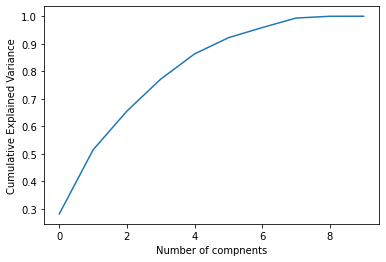

In [64]:
plt.figure()
plt.plot(np.cumsum(var))
plt.xlabel('Number of compnents')
plt.ylabel('Cumulative Explained Variance') #it shows that we can keep 6/7 PCA for getting maximum variance from the data